In [83]:
import os
import re
from bs4 import BeautifulSoup
import joblib
import numpy as np
import json
import gzip
from selenium import webdriver
import path
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load predict url model
model = joblib.load('detect_product_url_model.sav')

In [84]:
html=''
darkPatternTypeIndex=[
    "Activity Notification",
    "Confirmshaming",
    "Countdown Timer",
    "Hard to Cancel",
    "Hidden Subscription",
    "High-demand Message",
    "Limited-time Message",
    "Low-stock Message",
    "Pressured Selling",
    "Sneak into Basket",
    "Trick Questions",
    "Visual Interference"
]
dataAnalyze={
    "total_dark_pattern_each_category":[],
    "total_instant":0,
    "total_site_dark_pattern_each_type":[0,0,0,0,0,0,0,0,0,0,0,0],
    "total_dark_pattern_each_type":[0,0,0,0,0,0,0,0,0,0,0,0]
}
totalDarkPatternInstant=0
darkPatternEachSiteSiteDiagram=[]
totalDarkPatternEachTypeDiagram=[]
totalSite = 0 
totalSiteHaveDarkPattern = 0

for filename in os.listdir(os.path.expanduser('~/Research/dark-pattern-detector/crawler/dataDetect')):
    start = time.time()
    f=open(os.path.expanduser('~/Research/dark-pattern-detector/crawler/dataDetect/')+filename,'rb')
    productUrl = json.load(f)
    categoryName = productUrl['data']['category']
    
    totalDarkPatternInCategory=0
    
    totalDarkPatternEachCategory=[0,0,0,0,0,0,0,0,0,0,0,0]
    
    for i in range(0,len(productUrl['data']['data'])):
        for resultIndex in range(0,len(productUrl['data']['data'][i]['result'])):
            totalSite=totalSite+len(productUrl['data']['data'][i]['result'])
            isCountEachSite = 0
            for darkPattern in range(0,len(productUrl['data']['data'][i]['result'][resultIndex]['dark_pattern'])):
                if len(productUrl['data']['data'][i]['result'][resultIndex]['dark_pattern'])>0:
                    if(isCountEachSite==0):
                        totalDarkPatternInCategory=totalDarkPatternInCategory+1
                        isCountEachSite=1
                    darkPatternEachSiteSiteDiagram.append((productUrl['data']['data'][i]['result'][resultIndex]['dark_pattern'][darkPattern]['type']))
                    for instant in range(0,len(productUrl['data']['data'][i]['result'][resultIndex]['dark_pattern'][darkPattern]['instance'])):
                        totalDarkPatternEachTypeDiagram.append((productUrl['data']['data'][i]['result'][resultIndex]['dark_pattern'][darkPattern]['type']))
                        totalDarkPatternInstant=totalDarkPatternInstant+1
                    
                    totalSiteHaveDarkPattern=totalSiteHaveDarkPattern+1
                    indexOfCurrentDarkPatternType=darkPatternTypeIndex.index(productUrl['data']['data'][i]['result'][resultIndex]['dark_pattern'][darkPattern]['type'])
                    dataAnalyze["total_site_dark_pattern_each_type"][indexOfCurrentDarkPatternType] = dataAnalyze["total_site_dark_pattern_each_type"][indexOfCurrentDarkPatternType]+1
                    dataAnalyze["total_dark_pattern_each_type"][indexOfCurrentDarkPatternType] = dataAnalyze["total_dark_pattern_each_type"][indexOfCurrentDarkPatternType]+len(productUrl['data']['data'][i]['result'][resultIndex]['dark_pattern'])
    
    dataAnalyze["total_dark_pattern_each_category"].append({"category":categoryName,"count":totalDarkPatternInCategory})
    dataAnalyze["total_instant"] = totalDarkPatternInstant

print("total site: ",totalSite)
print("total Dark Pattern instant",totalDarkPatternEachTypeDiagram)
print("total site have Dark Pattern", totalSiteHaveDarkPattern)

total site:  60000
total Dark Pattern instant ['Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Countdown Timer', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Low-stock Message', 'Low-stock Message', 'Low-stock Message', 'Low-stock Message', 'Low-stock Message', 'Low-stock Message', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activity Notification', 'Activit

In [85]:
print(dataAnalyze["total_dark_pattern_each_category"])

[{'category': 'Antiques_and_Collectibles', 'count': 108}, {'category': 'Crafts', 'count': 99}, {'category': 'Photography', 'count': 114}, {'category': 'General_Merchandise', 'count': 48}, {'category': 'Office_Products', 'count': 146}, {'category': 'Sports', 'count': 180}, {'category': 'Weddings', 'count': 72}, {'category': 'Health', 'count': 149}, {'category': 'Entertainment', 'count': 74}, {'category': 'Death_Care', 'count': 46}, {'category': 'Flowers', 'count': 30}, {'category': 'Pets', 'count': 147}, {'category': 'Gifts', 'count': 132}, {'category': 'Music', 'count': 119}, {'category': 'Jewelry', 'count': 122}, {'category': 'Consumer_Electronics', 'count': 153}, {'category': 'Children', 'count': 140}, {'category': 'Niche', 'count': 113}, {'category': 'Ethnic_and_Regional', 'count': 52}, {'category': 'Recreation', 'count': 150}, {'category': 'Food', 'count': 66}, {'category': 'Clothing', 'count': 130}, {'category': 'Travel', 'count': 85}, {'category': 'Auctions', 'count': 147}, {'cat

In [86]:
dataAnalyze["total_dark_pattern_each_type"]

[4332, 778, 1460, 0, 0, 12, 1662, 1830, 0, 0, 0, 2]

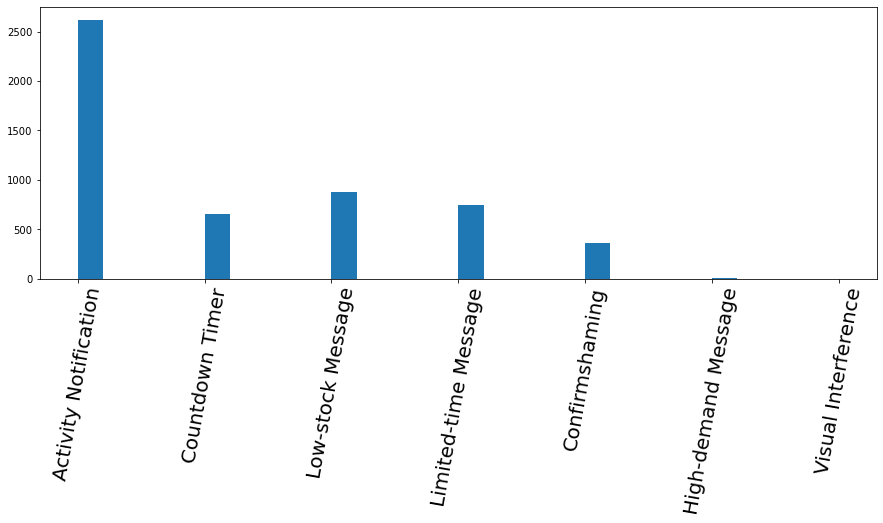

Activity Notification  ->  2619
Countdown Timer  ->  654
Low-stock Message  ->  881
Limited-time Message  ->  746
Confirmshaming  ->  357
High-demand Message  ->  4
Visual Interference  ->  1


In [87]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(darkPatternEachSiteSiteDiagram, bins=30)
plt.ylim(0)
ax.tick_params(axis='x', rotation=80,labelsize=20)
plt.show()

import collections 

def CountFrequency(arr): 
    return collections.Counter(arr)   
  
freq = CountFrequency(darkPatternEachSiteSiteDiagram) 

for key, value in freq.items(): 
    print(key," -> ", value)

In [88]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(totalDarkPatternEachTypeDiagram, bins=30)
plt.ylim(0)
ax.tick_params(axis='x', rotation=80,labelsize=20)
plt.show()

import collections 

def CountFrequency(arr): 
    return collections.Counter(arr)   
  
freq = CountFrequency(totalDarkPatternEachTypeDiagram) 

for key, value in freq.items(): 
    print(key," -> ", value)

Activity Notification  ->  11299
Countdown Timer  ->  1615
Low-stock Message  ->  2864
Limited-time Message  ->  1260
Confirmshaming  ->  515
High-demand Message  ->  4
Visual Interference  ->  1
